## [02] OpenAPI를 사용하여 공공데이터 수집하기
#### 데이터 신청 URL = https://www.data.go.kr/data/3056201/openapi.do
#### 활용 데이터 : 부산광역시 실내 공기질 실시간 측정 자료
#### [학습 목표]
>    1. OpenAPI 활용신청
>   2. key 발급
> 3. reqeust 라이브러리를 통한 데이터 수집
> 4. json 형식으로 저장
> 5. pandas 라이브러리 사용하여 데이터프레임 형태로 저장

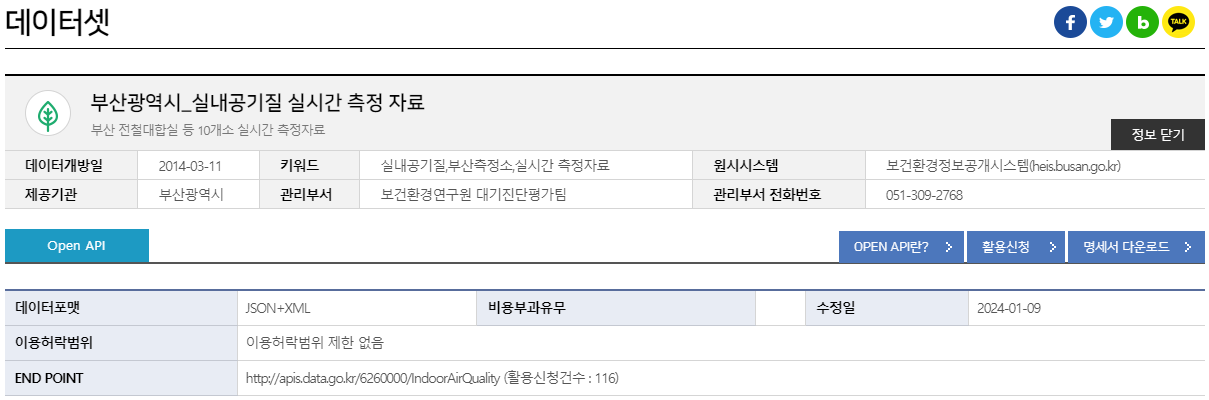

In [1]:
import requests as req
import pandas as pd
res = req.get("http://apis.data.go.kr/6260000/IndoorAirQuality/getIndoorAirQualityByItem?serviceKey=gs55cZpablm9nUFBa%2FfQAyB2APIBMgixS6hLOBZr%2BlAnS3bAYy4hDVWNjEl82iSOlWnTSm6fx6ppdbuDlOh%2Bkg%3D%3D&pageNo=1&numOfRows=50&resultType=json&item=co2&item=pm10")

In [2]:
res.text

'{"getIndoorAirQualityByItem":{"header":{"resultCode":"00","resultMsg":"NORMAL_CODE"},"body":{"items":{"item":[{"controlnumber":2024051516,"office":"부산광역시","city":"1호선","site":"하단","item_val":"-","item":"pm10"},{"controlnumber":2024051516,"office":"부산광역시","city":"1호선","site":"당리","item_val":"-","item":"pm10"},{"controlnumber":2024051516,"office":"부산광역시","city":"1호선","site":"사하","item_val":"-","item":"pm10"},{"controlnumber":2024051516,"office":"부산광역시","city":"1호선","site":"괴정","item_val":"-","item":"pm10"},{"controlnumber":2024051516,"office":"부산광역시","city":"1호선","site":"대티","item_val":"-","item":"pm10"},{"controlnumber":2024051516,"office":"부산광역시","city":"1호선","site":"서대신","item_val":"-","item":"pm10"},{"controlnumber":2024051516,"office":"부산광역시","city":"1호선","site":"동대신","item_val":"-","item":"pm10"},{"controlnumber":2024051516,"office":"부산광역시","city":"1호선","site":"토성","item_val":"-","item":"pm10"},{"controlnumber":2024051516,"office":"부산광역시","city":"1호선(대합실)","site":"자갈치","item_val":

In [3]:
# json구조의 데이터를 > 파이썬 딕셔너리형태로 변형
import json

In [4]:
result = json.loads(res.text)

In [10]:
len(result["getIndoorAirQualityByItem"]["body"]["items"]["item"])

50

In [11]:
# 딕셔너리에서 벨류를 접근하고 싶을때는 딕셔너리이름["키값"]
# 배열에 접근할때는 [인덱스]
result["getIndoorAirQualityByItem"]['body']['items']['item'][0]

{'controlnumber': 2024051516,
 'office': '부산광역시',
 'city': '1호선',
 'site': '하단',
 'item_val': '-',
 'item': 'pm10'}

In [12]:
# result json 결과 중 필요한 부분 추출
miselist = result["getIndoorAirQualityByItem"]['body']['items']['item']
miselist

[{'controlnumber': 2024051516,
  'office': '부산광역시',
  'city': '1호선',
  'site': '하단',
  'item_val': '-',
  'item': 'pm10'},
 {'controlnumber': 2024051516,
  'office': '부산광역시',
  'city': '1호선',
  'site': '당리',
  'item_val': '-',
  'item': 'pm10'},
 {'controlnumber': 2024051516,
  'office': '부산광역시',
  'city': '1호선',
  'site': '사하',
  'item_val': '-',
  'item': 'pm10'},
 {'controlnumber': 2024051516,
  'office': '부산광역시',
  'city': '1호선',
  'site': '괴정',
  'item_val': '-',
  'item': 'pm10'},
 {'controlnumber': 2024051516,
  'office': '부산광역시',
  'city': '1호선',
  'site': '대티',
  'item_val': '-',
  'item': 'pm10'},
 {'controlnumber': 2024051516,
  'office': '부산광역시',
  'city': '1호선',
  'site': '서대신',
  'item_val': '-',
  'item': 'pm10'},
 {'controlnumber': 2024051516,
  'office': '부산광역시',
  'city': '1호선',
  'site': '동대신',
  'item_val': '-',
  'item': 'pm10'},
 {'controlnumber': 2024051516,
  'office': '부산광역시',
  'city': '1호선',
  'site': '토성',
  'item_val': '-',
  'item': 'pm10'},
 {'controlnumb

In [13]:
df = pd.DataFrame()
df

""


In [14]:
import pandas as pd

# 초기 데이터프레임 생성
df = pd.DataFrame(columns=["controlnumber", "office", "city", "site", "item_val", "item"])

# miselist의 각 아이템을 데이터프레임으로 변환하여 기존 데이터프레임에 추가
for mise in miselist:
    mise_df = pd.DataFrame([mise])
    df = pd.concat([df, mise_df], ignore_index=True)

df.head()

,controlnumber,office,city,site,item_val,item
0,2024051516,부산광역시,1호선,하단,-,pm10
1,2024051516,부산광역시,1호선,당리,-,pm10
2,2024051516,부산광역시,1호선,사하,-,pm10
3,2024051516,부산광역시,1호선,괴정,-,pm10
4,2024051516,부산광역시,1호선,대티,-,pm10


#### [실습] '부산광역시 관광실태조사 통계정보 서비스' 데이터 가져오기
#### 데이터 신청 URL = https://data.busan.go.kr/dataSet/detail.nm?publicdatapk=15056572&contentId=10
#### 활용 데이터 : 부산광역시 관광실태조사 통계정보 서비스
#### HINT !!!!
>    1. OpenAPI 활용신청
>   2. key 발급
> 3. reqeust 라이브러리를 통한 데이터 수집
> 4. json 형식으로 저장
> 5. pandas 라이브러리 사용하여 데이터프레임 형태로 저장

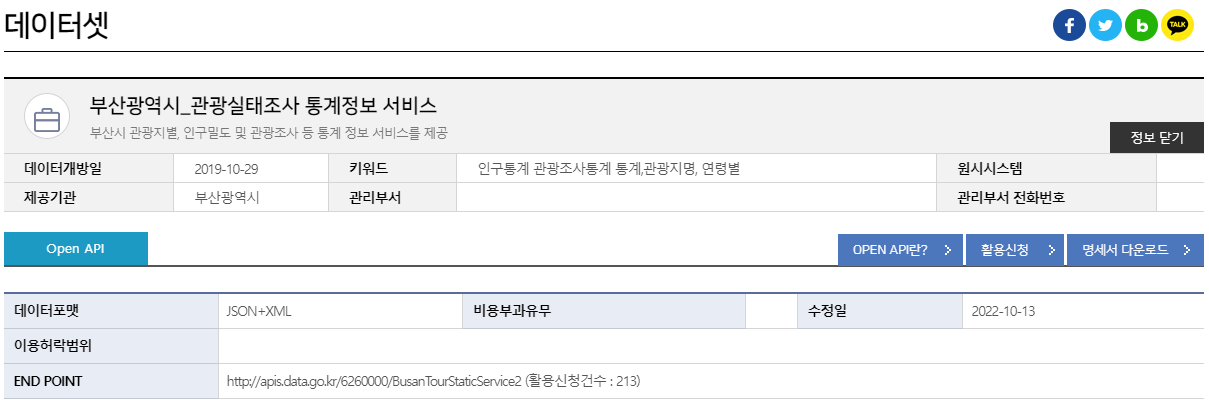

In [69]:
ex1 = req.get("https://apis.data.go.kr/6260000/BusanTourStaticService2/getVisitorStatInfo2?serviceKey=G0ACe6DxbHMpFeDA4UaIh%2F1QB5OvsDGSrBA94rSIuDpOVLtMa1cgRxSK2Nlp5bWIxJbv5aje7xgKcn9x3e0J9w%3D%3D&numOfRows=10&pageNo=1&resultType=json")

In [70]:
ex1.text

'{"getVisitorStatInfo":{"header":{"resultCode":"00","resultMsg":"NORMAL_CODE"},"body":{"items":{"item":[{"spot":"BIFF광장·용두산공원,보수동책방골목","teens":"113008","agetwenties":"400169","agethirties":"383953","ageforties":"417484","agefifties":"357539","agesixties":"299052","provincegangwon":"47200","provincegyeonggi":"406039","provincegyeongnam":"345244","provincegyeongbuk":"102721","provincegwangju":"21717","provincedaegu":"157822","provincedaejeon":"37435","provinceseoul":"357761","provincesejong":"22166","provinceulsan":"138904","provinceincheon":"93496","provincejeonnam":"69442","provincejeonbuk":"33842","provincejeju":"37449","provincechungnam":"67309","provincechungbuk":"32664","distribution":"2463227512","medical":"958692434","entertainment":"5068470084","edu":"591530129","clothing":"2586385764","beauty":"921787813","sports":"1879219481","grocery":"460363898","travel":"149356280","electronic":"42717430","service":"10298170","oiling":"0","car":"118393204","online":"25677805"},{"spot":"감천문화

In [71]:
result1 = json.loads(ex1.text)

In [63]:
main_data = result1["getVisitorStatInfo"]["body"]["items"]["item"]

In [64]:
df = pd.DataFrame()
for main in main_data:
    df = pd.concat([df, pd.DataFrame([main])], ignore_index=True)

In [65]:
df

,spot,teens,agetwenties,agethirties,ageforties,agefifties,agesixties,provincegangwon,provincegyeonggi,provincegyeongnam,...,clothing,beauty,sports,grocery,travel,electronic,service,oiling,car,online
0,"BIFF광장·용두산공원,보수동책방골목",113008,400169,383953,417484,357539,299052,47200,406039,345244,...,2586385764,921787813,1879219481,460363898,149356280,42717430,10298170,0,118393204,25677805
1,감천문화마을,14367,38767,35328,42599,36946,29615,6825,41568,41715,...,160144599,33826994,103252640,173970977,0,23205510,28450666,0,0,0
2,광안리 해수욕장,45022,251765,191372,154270,120878,81907,17237,183784,117171,...,856048107,611619991,1330741424,382925012,2276886360,29378300,264361516,0,648577362,0
3,국립해양박물관,6175,17562,16876,19396,17193,12701,2924,20535,10792,...,0,0,0,0,0,0,0,0,0,0
4,"다대포 해수욕장(꿈의 낙조분수, 몰운대)",5776,29601,40230,43500,34571,25365,11538,25426,40338,...,3151000,223755160,178008820,416798160,0,0,12646089,0,71903500,0
5,달맞이고개,16192,60895,77722,72198,57037,43893,5980,72064,33682,...,0,0,0,0,0,0,0,0,0,0
6,동백섬&누리마루APEC하우스,89310,301475,318148,294644,197098,131727,23987,336755,106723,...,0,4945400,67284705,136352750,3485837951,0,0,0,0,0
7,렛츠런파크,9362,36668,102422,144091,129532,71641,3433,42180,285203,...,0,0,3339900,52245720,0,0,0,0,0,0
8,마린시티 카페거리,69849,240586,266004,240309,168370,120577,20600,259769,100390,...,249805278,332297807,160072375,195772277,2194666625,0,24327000,0,6086190,0
9,민락수변공원,36168,199068,183898,159162,119741,81191,17585,170087,94653,...,0,0,0,0,0,0,0,0,0,0
